In [1]:
#import libraries

import pandas as pd
import numpy as np

df = pd.read_csv('agg_station_data.csv')
print(df.info())
print(df['STATION'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203841 entries, 0 to 203840
Data columns (total 10 columns):
STATION              203841 non-null object
DATE                 203841 non-null object
ENTRIES              203841 non-null int64
ID                   203841 non-null object
NEW_ID               203841 non-null float64
DATE_TIME            203841 non-null object
WEEKDAY              203841 non-null object
ENTRY_COUNT          203841 non-null float64
Station_Latitude     203841 non-null float64
Station_Longitude    203841 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 15.6+ MB
None
World Trade Center                    10190
34th St                                7889
Fulton St                              4006
86th St                                3215
23rd St                                3083
                                      ...  
Cypress Hills                           123
Morris Park                             123
238th St-Nereid Av        

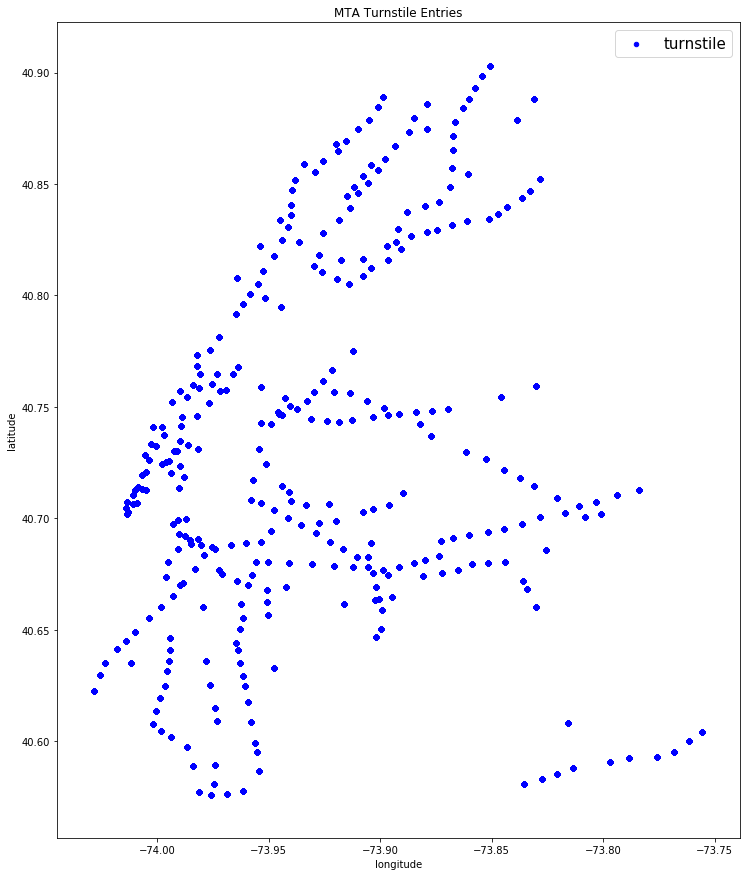

In [2]:
#geo plot station locations: each marker is plotted per Station_Longitude and Station_Latitude 
import descartes
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon 
%matplotlib inline

geometry = [Point(xy) for xy in zip(df["Station_Longitude"],df["Station_Latitude"])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df, geometry=geometry)
geo_df.head(20)


street_map = gpd.read_file('agg_station_data.csv')

fig, ax = plt.subplots(figsize =(15,15))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df[geo_df['STATION']!='NaN'].plot(ax=ax, markersize = 20, color="blue", marker = "o", label = "turnstile")
plt.title('MTA Turnstile Entries')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(prop={'size':15})




In [3]:
#function to create new geo dataframe for geo plot of ENTRY_COUNT
#NOTE: have to divide ENTRY_COUNT by standard number (e.g., 10) to normalize circle sizes--otherwise too large to see differences
def process_dataframes(df_geo):
    df_geo = df.dropna()
    agg_entries = geo_df.groupby(['STATION', 'Station_Latitude', 'Station_Longitude'])['ENTRY_COUNT'].sum().reset_index()
    return agg_entries
mta_turnstile_entries = process_dataframes(geo_df)
mta_turnstile_entries['ENTRY_COUNT'] = mta_turnstile_entries['ENTRY_COUNT']/10
mta_turnstile_entries.describe()

,Station_Latitude,Station_Longitude,ENTRY_COUNT
count,336.000000,336.000000,336.000000
mean,40.728906,-73.927894,10470.189583
std,0.080998,0.058941,17078.061732
min,40.576127,-74.028398,128.900000
25%,40.676588,-73.977179,2834.100000
50%,40.713913,-73.937606,5293.050000
75%,40.792490,-73.891141,10805.975000
max,40.903125,-73.755405,190306.900000


In [4]:
#function to create folium circle markers, to be overlaid onto map 
def add_markers_folium_map(df, m, color): 
    for i in range(0,len(df)):
        folium.Circle(location=[df['Station_Latitude'][i], df['Station_Longitude'][i]], popup='Turnstile Entries: '+df['STATION'][i]+ ' #ENTRY_COUNT = %i' %int(df['ENTRY_COUNT'][i]*10), radius=float(df['ENTRY_COUNT'][i])*0.007, color = color, fill = True, fill_color = color).add_to(m)
    return m

In [5]:
import folium
from folium import plugins


In [6]:
#plot folium map & the circle markers 
#larger radius is proportional to higher ENTRY_COUNT
mta_turnstile_entries.describe()
m = folium.Map(width=1000,height=1000, zoom_start=12,location=[np.mean(mta_turnstile_entries['Station_Latitude']), np.mean(mta_turnstile_entries['Station_Longitude'])])
m = add_markers_folium_map(mta_turnstile_entries, m, 'red')
m

